# Emmanuel Hounkponou_ Exercice_Webscraping

In [2]:
#Installing packages
pip install word2number

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5580 sha256=7db23f633d786a218bbace5d04b52626b8fb6ad1e1f6eeafc33aadc6e550d91a
  Stored in directory: c:\users\haefs\appdata\local\pip\cache\wheels\a0\4a\5b\d2f2df5c344ddbecb8bea759872c207ea91d93f57fb54e816e
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [3]:
#immporting packages
from bs4 import BeautifulSoup as bs
import requests
import re
import pandas as pd
from word2number import w2n
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Part1: books.toscrape.com Scraping

In [4]:
#Lists Creation

Availability=[]
Titles=[]
currency=[]
Categories=[]
Stocks=[]
Images=[]
Ratings=[]
Prices=[]
Currency=[]

for i in range (1,51): #i obtain 50 by dividing the number of books on the website:1000 (according to the home page of the website)by the number of books per page:20.

    url='http://books.toscrape.com/catalogue/page-'+str(i)+'.html' #this url refer to each page 
    
    #print(url)
    r=requests.get(url)
    #print(r.status_code)
    soup=bs(r.content,'html.parser').find('ol',{'class','row'})
    items=soup.find_all('li')
    
#In order to collect all the book information i use a for loop 
    for item in items:
        url2='http://books.toscrape.com/catalogue/'+item.find('a')['href'] #url of each book per page
        # print(url2)
        r2=requests.get(url2)
        #print(r.status_code)
        soup2=bs(r2.content,'html.parser')
        
    #   Scrapping the title, image's url , price stock availability, category, rating of each book on the website
        title=soup2.find('h1')
        image=soup2.find('img')['src']
        price=soup2.find('p',{'class':'price_color'}).text
        stock=soup2.find('p',{"class":"instock availability"})
        availability=item.find('p',{'class':'instock availability'}).text.strip()
        category=soup2.find('ul',{"class":"breadcrumb"}).text.replace("\n","").replace(title.text,"").replace("HomeBooks","")# selecting the category by replacing title and '\n'
        rating = w2n.word_to_num(re.search('<p class=\"star-rating \w+\">',str(items)).group()
                                 .replace('<p class=\"star-rating ', '').replace('\">', ''))  
        
     # Putting scrap informations in their list
    
        Titles.append(title.text)
        Categories.append(category)
        Images.append(image)
        Prices.append(price [1:6]) # selecting the price
        Currency.append(price[0]) # selecting the currency
        Stocks.append(stock.text.replace("\n","")[22:24]) #selecting the number of book in stock
        Availability.append(availability.replace("\n","")) # availability
        Ratings.append(rating)
      
       

# Part2: DataFrame 

In [298]:
#DataFrame Creation
data=list(zip(Categories,Titles,Images,Prices,Currency,Stocks,Availability,Ratings))#first i zip all the list

#Then create the dataframe namedd here data
data=pd.DataFrame(data,columns=['Categories','Titles','Images','Prices','Currency','Stocks','Availability','Ratings'])
data

,Categories,Titles,Images,Prices,Currency,Stocks,Availability,Ratings
0,Poetry,A Light in the Attic,../../media/cache/fe/72/fe72f0532301ec28892ae7...,51.77,£,22,In stock,3
1,Historical Fiction,Tipping the Velvet,../../media/cache/08/e9/08e94f3731d7d6b760dfbf...,53.74,£,20,In stock,3
2,Fiction,Soumission,../../media/cache/ee/cf/eecfe998905e455df12064...,50.10,£,20,In stock,3
3,Mystery,Sharp Objects,../../media/cache/c0/59/c05972805aa7201171b8fc...,47.82,£,20,In stock,3
4,History,Sapiens: A Brief History of Humankind,../../media/cache/ce/5f/ce5f052c65cc963cf4422b...,54.23,£,20,In stock,3
...,...,...,...,...,...,...,...,...
995,Classics,Alice in Wonderland (Alice's Adventures in Won...,../../media/cache/99/df/99df494c230127c3d5ff53...,55.53,£,1,In stock,2
996,Sequential Art,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",../../media/cache/30/98/309814b6eeba469f4c7411...,57.06,£,1,In stock,2
997,Historical Fiction,A Spy's Devotion (The Regency Spies of London #1),../../media/cache/f9/6b/f96b60a7614c4e3e868b82...,16.97,£,1,In stock,2
998,Mystery,1st to Die (Women's Murder Club #1),../../media/cache/f6/8e/f68e6ae2f9da04fccbde84...,53.98,£,1,In stock,2


# Part 3: Descriptive Statistics

In [299]:
data.info()
#We can see that all of our variables are in object type except thhe ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Categories    1000 non-null   object
 1   Titles        1000 non-null   object
 2   Images        1000 non-null   object
 3   Prices        1000 non-null   object
 4   Currency      1000 non-null   object
 5   Stocks        1000 non-null   object
 6   Availability  1000 non-null   object
 7   Ratings       1000 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [300]:
data['Stocks']=data['Stocks'].astype(int)
data['Prices']=data['Prices'].astype(float)

In [301]:
#The data shape
data.shape

(1000, 8)

In [302]:
# On this website we have 1000 books distributed into 50 categories
data['Categories'].unique()
len(data['Categories'].unique())

50

<AxesSubplot:xlabel='count', ylabel='Categories'>

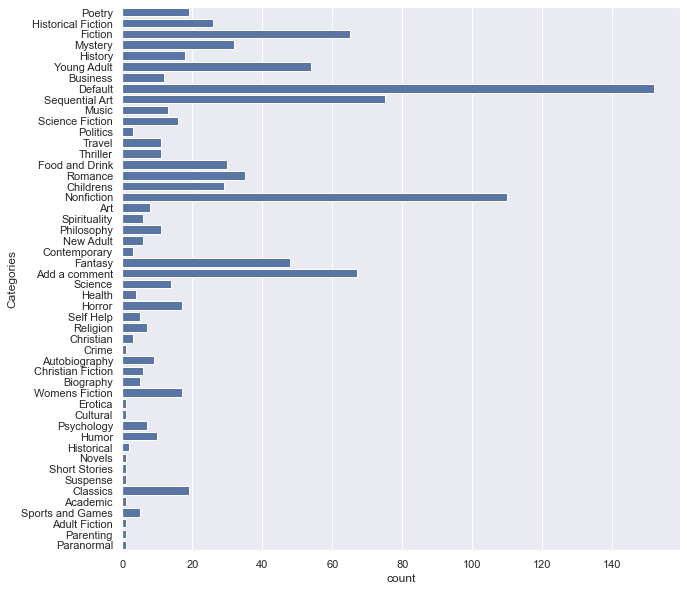

In [303]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y="Categories", data=data, color="b")
#We can see here the distribution of books per category

<function matplotlib.pyplot.show(close=None, block=None)>

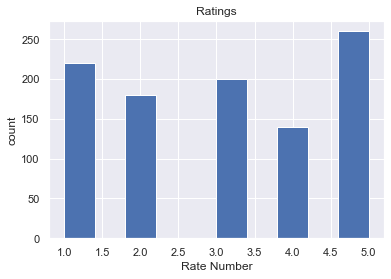

In [304]:
plt.hist(data['Ratings'],color='b')
plt.title('Ratings')
plt.xlabel('Rate Number')
plt.ylabel('count')
plt.show
#On the graphic above we can see that 250 books receive a grade of 5.
#The lowest count is obtained by rating 4

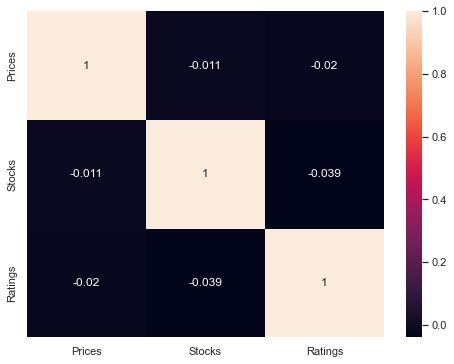

In [305]:
#Correlation matrix
corr_data = data.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True)
plt.show()
# We can see that the variables are poorly correlated

In [306]:
data.describe()
#The mean price of a book is 35£
#the most expensive book costs 59.9£
#The cheapest book costs 10£

,Prices,Stocks,Ratings
count,1000.00000,1000.000000,1000.000000
mean,35.07035,8.585000,3.040000
std,14.44669,5.654622,1.496877
min,10.00000,1.000000,1.000000
25%,22.10750,3.000000,2.000000
50%,35.98000,7.000000,3.000000
75%,47.45750,14.000000,5.000000
max,59.99000,22.000000,5.000000


In [307]:
condition=(
(data['Prices']==59.9900) | (data['Prices']==10))
data.loc[condition]
#Here we can see the cheaper and cheapest books with and their characteristics

,Categories,Titles,Images,Prices,Currency,Stocks,Availability,Ratings
638,Young Adult,An Abundance of Katherines,../../media/cache/9b/c8/9bc86bc10a6beea536422b...,10.00,£,5,In stock,5
648,Romance,The Perfect Play (Play by Play #1),../../media/cache/b0/be/b0be8b72b97ba3185f7d55...,59.99,£,4,In stock,4
